# Homework 6: Classification of texts

In this homework assignment you will build a text classifier!

We will use the data from the Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data From there you should download the train.csv file. We will divide it into training and test samples by the code below, you don't need to change it!

We will work with a dataset of twitter posts. We have to solve the problem of binary classification - to determine whether the tweet contains information about the real disaster/incident or not.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Task 1 (0.5 points)

Print the information about the gaps in the data. If there are gaps, fill them in with a blank line.

In [ ]:
print('Gaps in the columns train:\n', train.isnull().sum())
print('Gaps in the columns test:\n', test.isnull().sum())

train = train.fillna('')
test = test.fillna('')
test.head()

Пропусков в столбцах train:
 id             0
keyword       44
location    1760
text           0
target         0
dtype: int64
Пропусков в столбцах test:
 id            0
keyword      17
location    773
text          0
target        0
dtype: int64


,id,keyword,location,text,target
2644,3796,destruction,,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## Assignment 2 (1 point)
Let's take a little look at our data. Visualize (where explicitly asked for) or display information about the following:

1. What is the distribution of classes in the training sample?
2. Look at the "keyword" column - take the 10 most occurring values, draw a step diagram of the distribution of classes depending on the keyword value, draw conclusions.

In [ ]:
import matplotlib as plt
%matplotlib inline

[[<AxesSubplot:title={'center':'target'}>]]
target
0    3024
1    2305
Name: target, dtype: int64


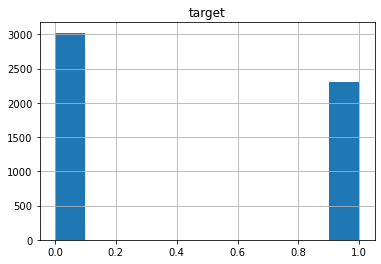

In [ ]:
print(train.hist('target'))
print(train.groupby('target')['target'].count())

In [ ]:
#For the training sample:
frame = train.groupby(by = 'keyword', as_index = False)['target'].count().sort_values(by = 'target', ascending=False).head(10)
frame['keyword']

AttributeError: module 'matplotlib' has no attribute 'bar'

In [ ]:
import numpy as np
a = pd.merge(frame, train, how='left', on='keyword')
b = a.groupby(by = ['keyword', 'target_y'], as_index = False)['target_x'].count()
groups = list(set(b['keyword']))
zero = list(b.loc[(b.target_y == 0)]['target_x'])
one = list(b.loc[(b.target_y == 1)]['target_x'])

## Assignment 3 (0.5 points) 

This task asks you to combine all three text columns into one (just concatenate the rows) and remove the column with the index.

In [ ]:
train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

In [ ]:
train['concat'] = train['keyword'] + ' ' + train['location'] + ' ' + train['text']
train

,keyword,location,text,target,concat
1186,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,police Houston CNN: Tennessee movie theater s...
5787,rioting,,Still rioting in a couple of hours left until ...,1,rioting Still rioting in a couple of hours le...
7445,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,wounds Lake Highlands Crack in the path where ...
...,...,...,...,...,...
5226,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0,obliteration Merica! @Eganator2000 There aren'...
5390,panic,,just had a panic attack bc I don't have enough...,0,panic just had a panic attack bc I don't have...
860,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0,blood Omron HEM-712C Automatic Blood Pressure...
7603,,,Officials say a quarantine is in place at an A...,1,Officials say a quarantine is in place at an...


In [ ]:
test['concat'] = test['keyword'] + ' ' + test['location'] + ' ' + test['text']
test

,keyword,location,text,target,concat
2644,destruction,,So you have a new weapon that can cause un-ima...,1,destruction So you have a new weapon that can...
2227,deluge,,The f$&amp;@ing things I do for #GISHWHES Just...,0,deluge The f$&amp;@ing things I do for #GISHW...
5448,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,police UK DT @georgegalloway: RT @Galloway4May...
132,aftershock,,Aftershock back to school kick off was great. ...,0,aftershock Aftershock back to school kick off...
6845,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0,"trauma Montgomery County, MD in response to tr..."
...,...,...,...,...,...
4307,hellfire,"570 Vanderbilt; Brooklyn, NY",New cocktail on the list! El Diablo Mas Verde:...,0,"hellfire 570 Vanderbilt; Brooklyn, NY New cock..."
3375,evacuation,USA,Bend Post Office roofers cut gas line prompt e...,1,evacuation USA Bend Post Office roofers cut ga...
1710,collided,,Monsoon flooding - Monsoon rains have have hit...,1,collided Monsoon flooding - Monsoon rains hav...
4898,massacre,Ireland,Remember this was a massacre of civilians. #Hi...,1,massacre Ireland Remember this was a massacre ...


## Task 4 (0.5 points)

Next we will work with only the train part for now.

1. Preprocess the data (train part) using CountVectorizer.
2. What is the size of the matrix?


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\livanovskaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(train["concat"])
print('Размер получившийся матрицы:', X.shape)

Размер получившийся матрицы: (5329, 18455)


## Assignment 5 (1 point).

In the previous paragraph you should have had a fairly large matrix.
If you look at the text, you will see that there are a lot of special characters, references, and other garbage.

Let's also take a look at the vocabulary that resulted from the CountVectorizer construction, it can be found in the vocabulary_ field of the instance of this class. Let's write a function that prints the answers to the following questions:

1. Find all the words in this vocabulary that contain numbers. How many of these words did you find?

2. Find all the words that contain punctuation symbols. How many such words did you find? 

3. How many hashtags (token starts with #) and mentions (token starts with @) left in the dictionary?

In [ ]:
#vocabualary
words = pd.Series(vectorizer.vocabulary_).sort_values().index
from string import punctuation


def clearing(words):
    #Numbers
    numbers = []
    c = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
    for i in words:
        for j in i:
            if j in c:
                numbers.append(i)
                break
    #punctuation
    punc = []
    a = punctuation
    for i in words:
        for j in i:
            if j in a:
                punc.append(i)
                break
    #hashtags
    has = []
    for i in words:
        if i[0] == '#':
                has.append(i)

                
    #mentions
    tag = []
    for i in words:
        if i[0]=='@':
                tag.append(i)

    return [numbers, punc, has, tag]
print('Words with Numbers:', len(clearing(words)[0]))
print('Words with punctuations:', len(clearing(words)[1]))
print('Word hashtags:', len(clearing(words)[2]))
print('Words of mentions:', len(clearing(words)[3]))

Слов с цифрами: 3812
Слов со знаками пунктуации: 315
Слов-хэштегов: 0
Слов-упоминаний: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from nltk.tokenize import TweetTokenizer
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(builtins.object)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False, match_phone_numbers=True)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0)
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3'
 |      , 'and', 'some', 'arrows', '<', '>', '->', '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Methods defined here:
 |  
 |  __init__(self, preserve_case=True, reduce_len=F

In [ ]:
tw = TweetTokenizer()
twvect = CountVectorizer(tokenizer = tw.tokenize) 
XX = twvect.fit_transform(train["concat"])
XX.shape

(5329, 19670)

In [ ]:
words2 = pd.Series(twvect.vocabulary_).sort_values().index
print('Words with Numbers:', len(clearing(words2)[0]))
print('Words with punctuations:', len(clearing(words2)[1]))
print('Word hashtags:', len(clearing(words2)[2]))
print('Words of mentions:', len(clearing(words2)[3]))

Слов с цифрами: 3939
Слов со знаками пунктуации: 7338
Слов-хэштегов: 1470
Слов-упоминаний: 1679


In [1]:
#comparison:
print('TweetTokenizer takes hashtags and mentions into account, so it has no separation of characters and words in these situations. Because of this, it was able to highlight and count hashtags and mentions (while the regular tokenizer couldnt - so there values are 0). In addition, the regular tokenizer separates punctuation marks from words and so compared to the tweet tokenizer, which separates emoticons and leaves the grid and doggie with the word, the tweet tokenizer gets many more unique words with punctuation marks (and the regular tokenizer counts the punctuation mark as a separate word and so all words that had those marks are reduced to the word mark. Therefore, there are far fewer words with punctuation marks.)')

TweetTokenizer takes hashtags and mentions into account, so it has no separation of characters and words in these situations. Because of this, it was able to highlight and count hashtags and mentions (while the regular tokenizer couldnt - so there values are 0). In addition, the regular tokenizer separates punctuation marks from words and so compared to the tweet tokenizer, which separates emoticons and leaves the grid and doggie with the word, the tweet tokenizer gets many more unique words with punctuation marks (and the regular tokenizer counts the punctuation mark as a separate word and so all words that had those marks are reduced to the word mark. Therefore, there are far fewer words with punctuation marks.)


## Task 7 (2 points).

In scikit-learn we can evaluate the matrix counting process through CountVectorizer. CountVectorizer, like other \_VectorizerMixin heirs, has an argument tokenizer and preprocessor. The preprocessor will apply at the beginning to each row of your dataset, the tokenizer should accept the row and return the tokens.
Let's write a custom tokenizer that does what we need: 

0. Makes all the letters lowercase
1. Split the text into tokens using the TweetTokenizer from the nltk package
2. It will remove all the tokens containing non Latin letters except for smiley faces (we will consider tokens containing only punctuation and at least one bracket) and hashtags which contain only Latin letters after the initial #.
3. Deletes all the tokens listed in nltk.corpus.stopwords.words('english')
4. Stemming with SnowballStemmer.

Demonstrate how your function works on the first ten texts in the training sample.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\livanovskaya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
def Custom_tokenizer(data):
    from nltk.tokenize import TweetTokenizer
    from string import punctuation
    from nltk.stem.snowball import SnowballStemmer
    from nltk.corpus import stopwords
    data = data.lower()
    tw = TweetTokenizer()
    words = tw.tokenize(data) #array of strings
    allowed = 'abcdefghijklmnopqrstuvwxyz'
    punc = punctuation
    stop_words = []
    for i in words:
        for j in i:
            if j not in allowed:
                if i[0] != '#':
                    if j in punc:
                        if ('(' not in i) and (')' not in i):
                            stop_words.append(i)
                            break
                    else:
                        stop_words.append(i)
                        break
                        
    english_stop = nltk.corpus.stopwords.words('english')
    remove = [i for i in words if not i in stop_words and i not in english_stop]
    
    #stemming 
    stemmer = SnowballStemmer('english')
    text_stemmed = [stemmer.stem(w) for w in remove]
    return text_stemmed

In [ ]:
twvec = CountVectorizer(tokenizer = Custom_tokenizer) 
XXX = twvec.fit_transform(train['concat'].head(10))
words3 = pd.Series(twvec.vocabulary_).sort_values().index
words3

Index(['#goblu', '#mlb', '#wrestleon', '(', ')', 'accid', 'air', 'airplan',
       'among', 'ash', 'ask', 'australia', 'beach', 'begin', 'bloodi', 'boast',
       'bridg', 'bundl', 'burn', 'came', 'camp', 'carol', 'citi', 'class',
       'cnn', 'collaps', 'coupl', 'crack', 'dead', 'debri', 'destroy', 'elbow',
       'england', 'examin', 'except', 'exchang', 'expert', 'found', 'franc',
       'french', 'fun', 'great', 'hail', 'highland', 'histori', 'hour', 'hous',
       'houston', 'idk', 'illinoi', 'indian', 'island', 'isol', 'kill',
       'killer', 'knee', 'lake', 'left', 'maracay', 'michigan', 'morn', 'movi',
       'nirgua', 'offic', 'pakistani', 'path', 'perth', 'polic', 'realli',
       'remorseless', 'reunion', 'right', 'riot', 'run', 'shoot', 'shot',
       'show', 'smirk', 'somewher', 'still', 'stream', 'surfac', 'suspect',
       'techniqu', 'tennesse', 'thank', 'theater', 'trent', 'venezuela',
       'video', 'wipe', 'world', 'worst', 'wound'],
      dtype='object')

## Assignment 8 (1 point)

1. Apply CountVectorizer with the tokenizer implemented above to the training and test samples.
2. Train LogisticRegression on the obtained features.
3. Calculate the f1-score metric on the test data.

In [ ]:
train_1 = CountVectorizer(tokenizer = Custom_tokenizer) 
X_tr = train_1.fit_transform(train['concat'])
Y_tr = train['target']
X_te = train_1.transform(test['concat'])
Y_te = test['target']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_tr, Y_tr)

LogisticRegression()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
preds_te = model.predict(X_te)
print(f1_score(Y_te, preds_te))

0.754433100483611


## Assignment 9 (1 point)

1. Repeat task 7(8), but with the tf-idf vectorizer. How has the quality changed?
2. We can reduce the size of our matrix even further if we discard values of df close to one. Most likely, such words do not carry much information about the category, as they occur quite often. Limit the maximum df in TfIdfVectorizer parameters, set the upper bound equal to 0.9. How has the matrix size changed, how has the quality changed?
We can also reduce the size of the matrix by removing words with too small df. Were we able to achieve an improvement in quality? 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train_2 = TfidfVectorizer(tokenizer = Custom_tokenizer) 
X_tr2 = train_2.fit_transform(train['concat'])
Y_tr2 = train['target']
X_te2 = train_2.transform(test['concat'])
Y_te2 = test['target']

In [ ]:
X_tr2.shape

(5329, 10607)

In [ ]:
model2 = LogisticRegression()
model2.fit(X_tr2, Y_tr2)

LogisticRegression()

In [ ]:
preds_te2 = model2.predict(X_te2)
print(f1_score(Y_te2, preds_te2))

0.7422222222222221


In [2]:
print('The quality has decreased slightly')

The quality has decreased slightly


Изменяем df:

In [ ]:
train_3 = TfidfVectorizer(tokenizer = Custom_tokenizer, max_df=0.9) 
X_tr3 = train_3.fit_transform(train['concat'])
Y_tr3 = train['target']
X_te3 = train_3.transform(test['concat'])
Y_te3 = test['target']
X_tr3.shape

(5329, 10607)

the size of the matrix has not changed

In [ ]:
model3 = LogisticRegression()
model3.fit(X_tr3, Y_tr3)
preds_te3 = model3.predict(X_te3)
print(f1_score(Y_te3, preds_te3))

0.7422222222222221


In [ ]:
train_3 = TfidfVectorizer(tokenizer = Custom_tokenizer, min_df=0.0003) 
X_tr3 = train_3.fit_transform(train['concat'])
Y_tr3 = train['target']
X_te3 = train_3.transform(test['concat'])
Y_te3 = test['target']
X_tr3.shape

(5329, 4534)

In [ ]:
model3 = LogisticRegression()
model3.fit(X_tr3, Y_tr3)
preds_te3 = model3.predict(X_te3)
print(f1_score(Y_te3, preds_te3))

0.7462520821765685


When the lower threshold df is increased, the number of words decreased (matrix dimension), while the quality measured by the f1 measure increased

## Assignment 10 (1 point).

Another popular trick for reducing the number of features is called the hashing trick. The idea is that we randomly group the features and ..... add them up! And then we remove the original features. In the end, all of our traits are just sums of the original traits. It sounds strange, but it works just fine. Let's test this trick in our setting.
Also with this approach you don't need to store the token->index dictionary, which is also sometimes useful.

1. Repeat task 7(8) with HashingVectorizer, specify the number of features equal to 5000.
2. Which approach has the highest score?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
train_3 = HashingVectorizer(tokenizer = Custom_tokenizer, n_features=5000) 
X_tr3 = train_3.fit_transform(train['concat'])
#words7 = pd.Series(train_3.vocabulary_).sort_values().index
Y_tr3 = train['target']
X_te3 = train_3.transform(test['concat'])
Y_te3 = test['target']
X_tr3.shape

(5329, 5000)

In [ ]:
model3 = LogisticRegression()
model3.fit(X_tr3, Y_tr3)
preds_te3 = model3.predict(X_te3)
print(f1_score(Y_te3, preds_te3))

0.7191513121161363


Answer: Of all the approaches that were considered, CountVectorizer with custom tokenizer gave the highest result because it gave the highest f1 measure, while the other vectorizers trained the model with lower quality.

## Assignment 11 (1 point).

In this task you need to achieve an f1 measure of at least 0.75 on the test data.

In [ ]:
train_1 = CountVectorizer(tokenizer = Custom_tokenizer) 
X_tr = train_1.fit_transform(train['concat'])
Y_tr = train['target']
X_te = train_1.transform(test['concat'])
Y_te = test['target']
model = LogisticRegression()
model.fit(X_tr, Y_tr)
preds_te = model.predict(X_te)
print(f1_score(Y_te, preds_te))

0.754433100483611
